This is third part of https://www.kaggle.com/mustafacicek/detailed-marketing-cohort-pareto-rfm-forecast

You can reach this data from here. https://www.kaggle.com/mustafacicek/online-retail-final

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import PercentFormatter

pd.options.mode.chained_assignment = None

plt.rcParams["axes.facecolor"] = "#A2A2A2"
plt.rcParams["axes.grid"] = 1

In [2]:
df = pd.read_csv("../input/online-retail-final/online_retail_final.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Pareto Principle

The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the “vital few”).

Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity.

![](https://upload.wikimedia.org/wikipedia/commons/e/eb/Pareto_principle.png)

*https://en.wikipedia.org/wiki/Pareto_principle

**Lets implement Pareto's 80-20 rule to our dataset**. We have two hypothesis:

    1) 80% of company's revenue comes from 20% of total customers.

    2) 80% of company's revenue comes from 20% of total products.

**Sample Pareto Chart**

![](https://www.cec.health.nsw.gov.au/__data/assets/image/0005/341285/Pareto-1.png)

*https://www.cec.health.nsw.gov.au/Quality-Improvement-Academy/quality-improvement-tools/pareto-charts

**To check these hypothesis, we need only two things.** 

1) Individual sale records for customer/product

2) Calculating cumulative sum for them

I define below functions for calculation and visualization.

**prepare_pareto_data** finds individual revenue per customer/product and calculates cumulative percentage of them.

**create_pareto_plot** takes output from these data and visualize it.

In [3]:
def prepare_pareto_data(df, col, price):
    
    df_price = pd.DataFrame(df.groupby(col)[price].sum())
    df_price = df_price.sort_values(price, ascending = False)

    df_price["CumulativePercentage"] = (df_price[price].cumsum() / df_price[price].sum() * 100).round(2)
    
    return df_price

In [4]:
def create_pareto_plot(df, col, price, log = True):
    
    plt.rcParams["axes.facecolor"] = "#A2A2A2"
    fig, ax = plt.subplots(figsize = (15, 5), dpi = 150, facecolor = "#A2A2A2")
    plt.rcParams["axes.grid"] = False
    
    if log == True:
        sns.barplot(x = np.arange(len(df)), y = np.log(df[price]),  ax = ax, color = "#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x = np.arange(len(df)), y = df[price],  ax = ax, color = "#101820")

    ax2 = ax.twinx()
    
    sns.lineplot(x = np.arange(len(df)), y = df.CumulativePercentage, ax = ax2, color = "#0019AA")
    ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1)
    ax2.axhline(90, color = "#008878", linestyle = "dashed", alpha = 0.75)

    vlines = [int(len(df) * x / 10) for x in range(1, 10)]
    for vline in vlines: ax2.axvline(vline, color = "#008878", linestyle = "dashed", alpha = 0.1)
        
    interaction_80 = (df.shape[0] - df[df.CumulativePercentage >= 80].shape[0])
    ax2.axvline(interaction_80, color = "#008878", linestyle = "dashed", alpha = 1)

    interaction_80_percentage = round((interaction_80 / df.shape[0]) * 100)
    plt.text(interaction_80 + 25, 95, str(interaction_80_percentage) + "%")   
    
    prop = dict(arrowstyle= "-|>", color = "#000000", lw = 1.5, ls = "--")
    plt.annotate("", xy = (interaction_80 - 10, 80),  xytext = (interaction_80 + 120 , 73), arrowprops = prop)
    
    interaction_90 = (df.shape[0] - df[df.CumulativePercentage >= 90].shape[0])
    ax2.axvline(interaction_90, color = "#008878", linestyle = "dashed", alpha = 0.8)
    interaction_90_percentage = round((interaction_90 / df.shape[0]) * 100)
    plt.text(interaction_90 + 25, 95, str(interaction_90_percentage) + "%")   
    plt.annotate("", xy = (interaction_90 - 10, 90),  xytext = (interaction_90 + 120 , 83), arrowprops = prop)

    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue", fontname = "Times New Roman")
    ax2.set_ylabel("Cumulative Percentage", fontname = "Times New Roman")
    subject = "Customers" if col == "CustomerID" else "Products"
    plt.title("Pareto Chart for " + subject, fontname = "Times New Roman")
    ax.set_xlabel(subject, fontname = "Times New Roman")
    sns.despine(left = True, right = True, bottom = True, top = True)
    plt.show()

# Pareto Chart for Customers

In [5]:
customer_price = prepare_pareto_data(df, "CustomerID", "TotalPrice")

customer_price.head(10)

,TotalPrice,CumulativePercentage
CustomerID,,
14646.0,189796.00,2.65
14911.0,129795.43,4.46
12415.0,81455.09,5.60
14156.0,81329.92,6.73
18102.0,80619.70,7.86
17511.0,78595.72,8.95
15311.0,57178.46,9.75
13089.0,56618.82,10.54
14096.0,52147.65,11.27


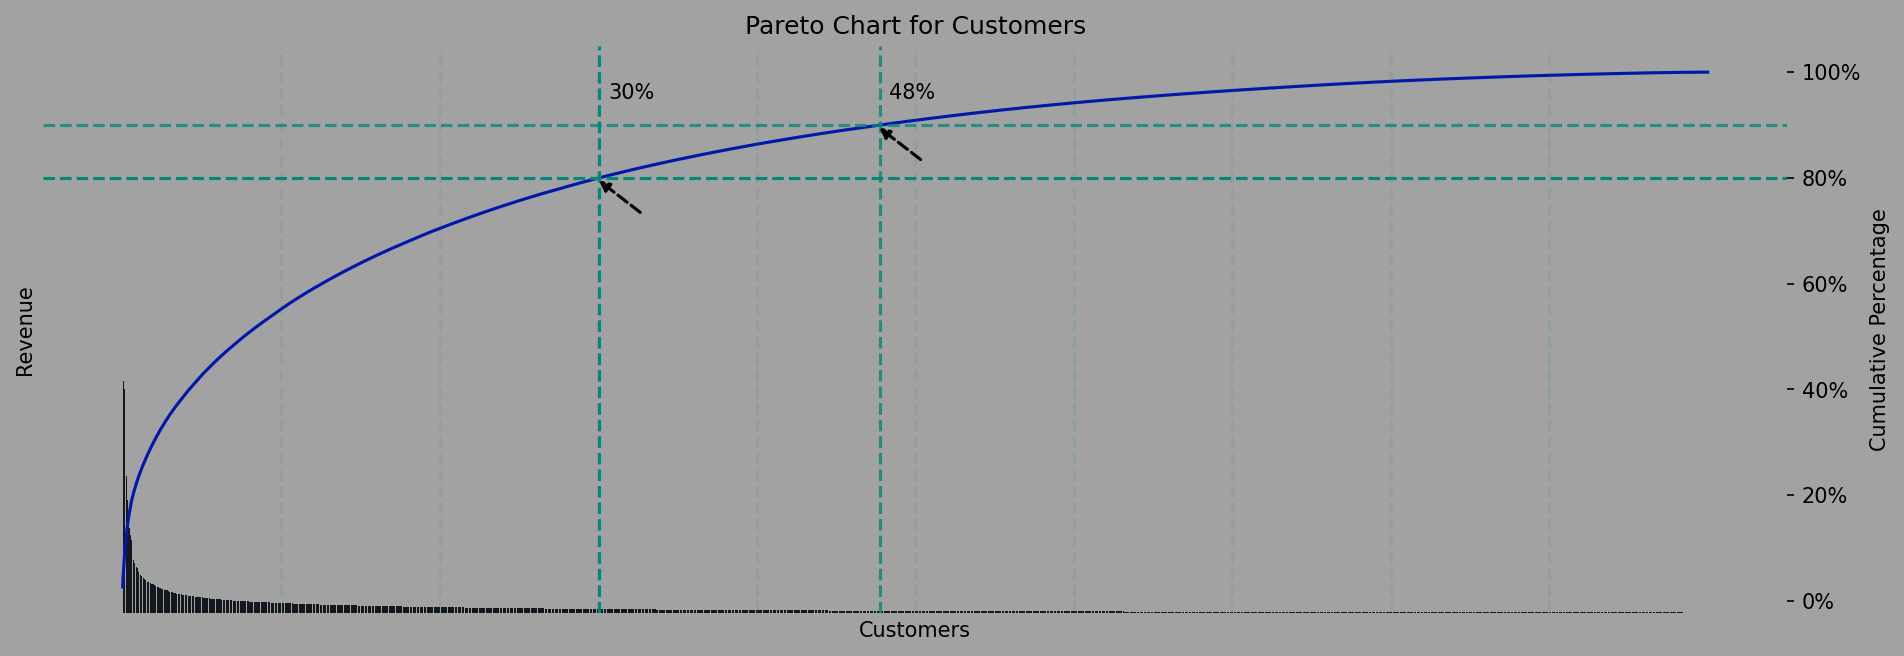

In [6]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = False)

We can also plot it in log scale. It helps us for better visualization.

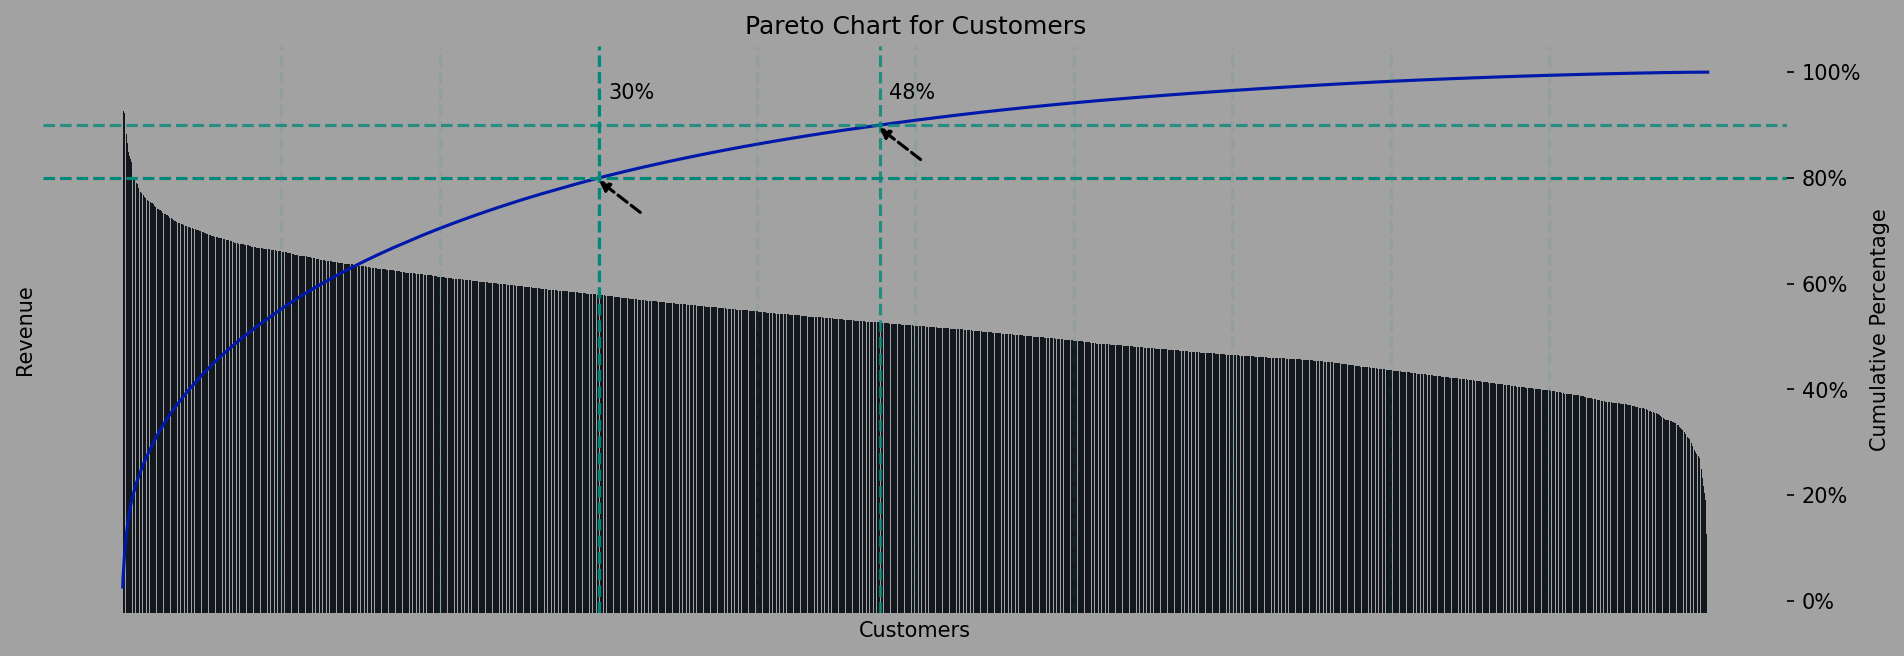

In [7]:
create_pareto_plot(customer_price, "CustomerID", "TotalPrice", log = True)

Well, lets interpret these two charts. Actually, we don't need to write a lot of things. 

We can see that 80% of company's revenue comes from top 30% of customers.

Also, 90% of company's revenue comes from top 48% of customers.

# Pareto Chart for Products

In [8]:
item_price = prepare_pareto_data(df, "StockCode", "TotalPrice")

item_price.head(10)

,TotalPrice,CumulativePercentage
StockCode,,
22423,132100.75,1.84
85123A,68282.78,2.80
47566,61166.83,3.65
85099B,57382.08,4.45
79321,37464.27,4.97
84879,37428.74,5.50
22086,35337.23,5.99
23298,31210.55,6.42
22960,30038.77,6.84


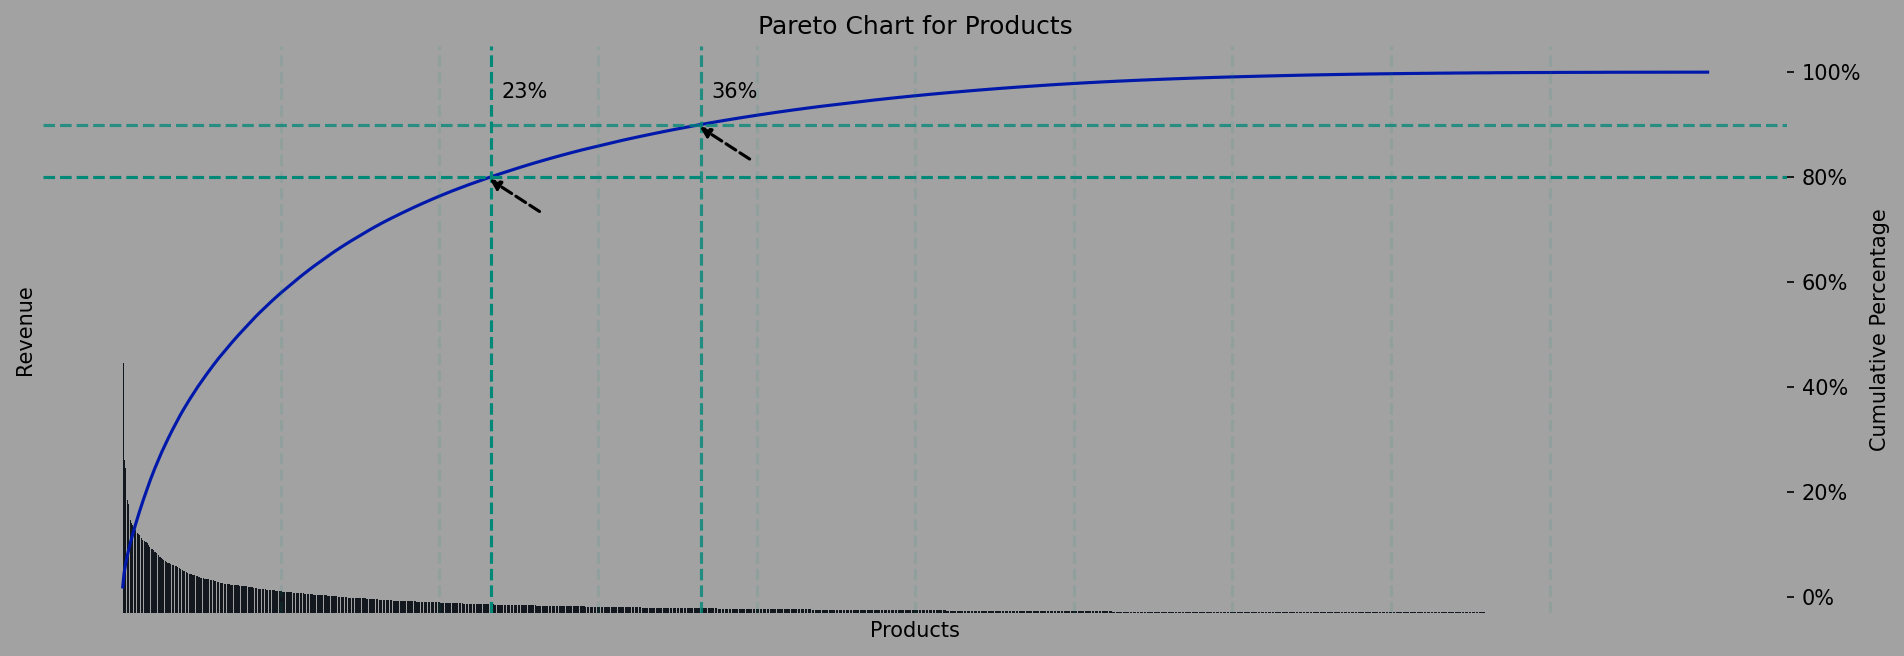

In [9]:
create_pareto_plot(item_price, "StockCode", "TotalPrice", log = False)

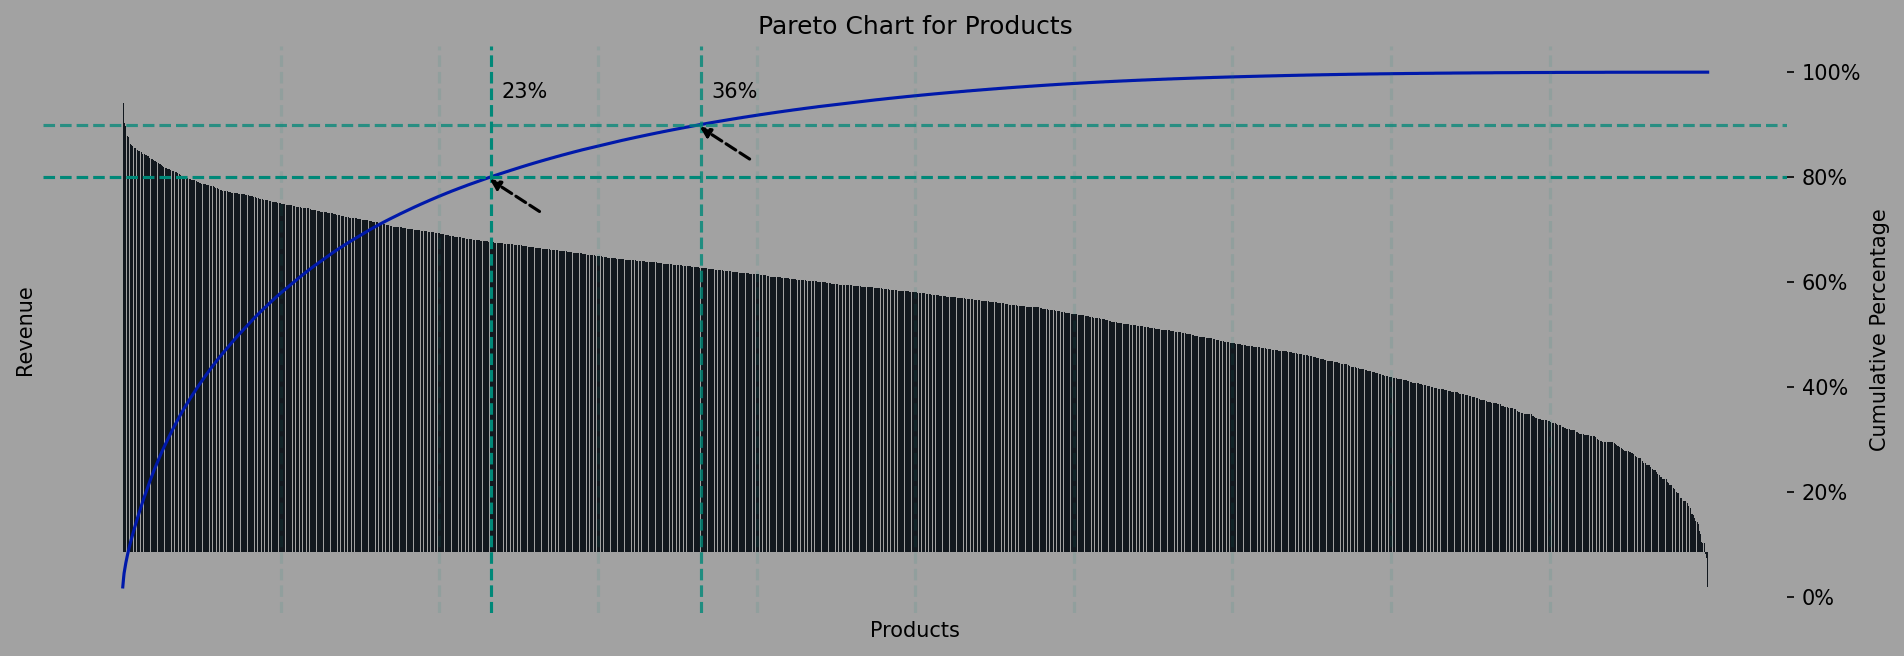

In [10]:
create_pareto_plot(item_price, "StockCode", "TotalPrice")

We can see that 80% of company's revenue comes from top 23% of products that have most revenue.

Also, 90% of company's revenue comes from 36% of products that have most revenue.

Maybe, if the company reduce by half its variety of items, revenue couldn't decrease significantly.

In [11]:
top_customers = customer_price[customer_price.CumulativePercentage <= 80].index.tolist()

products_for_top_customers = df[df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()

products_for_other_customers = df[~df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()

# Next

Next chapters:

https://www.kaggle.com/mustafacicek/marketing-analytics-rfm-analysis

https://www.kaggle.com/mustafacicek/marketing-analytics-forecasting

Full work: https://www.kaggle.com/mustafacicek/detailed-marketing-analytics-cohort-pareto-rfm